In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Cargar el archivo NPY
intervals = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/intervals_1601.npy')
intervals_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/intervals_ref_1601.npy')
labels_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/labels_1601.npy')
labels_1601_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/labels_ref_1601.npy')
test_intervals_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/test_intervals_1601.npy')
test_labels_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/test_labels_1601.npy')
x_out_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_1601.npy')
x_out_1601_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_ref_1601.npy')
x_out_1601_test = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_test_1601.npy')

print('intervals:', intervals.shape)
print('intervals_ref:', intervals_ref.shape)
print('labels_1601:', labels_1601.shape)
print('labels_1601_ref:', labels_1601_ref.shape)
print('test_intervals_1601:', test_intervals_1601.shape)
print('test_labels_1601:', test_labels_1601.shape)
print('x_out_1601:', x_out_1601.shape)
print('x_out_1601_ref:', x_out_1601_ref.shape)
print('x_out_1601_test:', x_out_1601_test.shape)


C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_11676\1249299595.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


intervals: (4800,)
intervals_ref: (80,)
labels_1601: (4800,)
labels_1601_ref: (80,)
test_intervals_1601: (2400,)
test_labels_1601: (2400,)
x_out_1601: (4800, 1601, 128, 1)
x_out_1601_ref: (80, 1601, 128, 1)
x_out_1601_test: (2400, 1601, 128, 1)


In [2]:
# Normalizar los datos de entrenamiento y prueba
x_out_1601 = x_out_1601.astype('float32') / 255.0
x_out_1601_test = x_out_1601_test.astype('float32') / 255.0

In [3]:
print('intervals:', intervals.shape)
print('labels_1601:', labels_1601.shape)
print('x_out_1601:', x_out_1601.shape)

print('test_intervals_1601:', test_intervals_1601.shape)
print('test_labels_1601:', test_labels_1601.shape)
print('x_out_1601_test:', x_out_1601_test.shape)

intervals: (4800,)
labels_1601: (4800,)
x_out_1601: (4800, 1601, 128, 1)
test_intervals_1601: (2400,)
test_labels_1601: (2400,)
x_out_1601_test: (2400, 1601, 128, 1)


**Analizamos incluyendo las posiciones**

In [4]:
unique_values = np.unique(intervals)
positions = {value: np.where(intervals == value)[0] for value in unique_values}
for value, pos in positions.items():
    np.save(f'positions_{value}.npy', pos)
    print(f"positions_{value} with shape {pos.shape}")

positions_050_080 with shape (1600,)
positions_080_110 with shape (1600,)
positions_110_140 with shape (1600,)


In [5]:
positions_050_080= np.load('positions_050_080.npy')
positions_080_110 = np.load('positions_080_110.npy')
positions_110_140 = np.load('positions_110_140.npy')

In [6]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
labels_1601_categorical = label_encoder.fit_transform(labels_1601)
labels_1601_categorical_test = label_encoder.transform(test_labels_1601)

In [7]:
# generamos los conjuntos de datos filtrados para cada intervalo 050_080 
filtered_x_out_1601_050_080 = x_out_1601[positions_050_080]
filtered_label_050_080 = labels_1601_categorical[positions_050_080]

# generamos los conjuntos de datos filtrados para cada intervalo 050_080
filtered_x_out_1601_080_110 = x_out_1601[positions_080_110]
filtered_label_080_110 = labels_1601_categorical[positions_080_110]

# generamos los conjuntos de datos filtrados para cada intervalo 050_080
filtered_x_out_1601_110_140 = x_out_1601[positions_110_140]
filtered_label_110_140 = labels_1601_categorical[positions_110_140]

In [9]:
def filter_cwt(X, thr):
    X_copy = X.copy()
    X_copy[X_copy < thr] = 0
    return X_copy

thr = 0.1
x_out_1601 = filter_cwt(x_out_1601, thr)
x_out_1601_test = filter_cwt(x_out_1601_test, thr)

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.0703 - loss: 2.7747 - val_accuracy: 0.1238 - val_loss: 2.7460
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.0930 - loss: 2.7476 - val_accuracy: 0.1625 - val_loss: 2.7168
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.1347 - loss: 2.7117 - val_accuracy: 0.2117 - val_loss: 2.6761
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.1669 - loss: 2.6609 - val_accuracy: 0.2479 - val_loss: 2.6165
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.1921 - loss: 2.5937 - val_accuracy: 0.3125 - val_loss: 2.5371
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.2170 - loss: 2.5140 - val_accuracy: 0.4008 - val_loss: 2.4493
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step - accuracy: 0.2646 - loss: 2.4020 - val_accuracy: 0.4858 - val_loss: 2.3565
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.3230 -

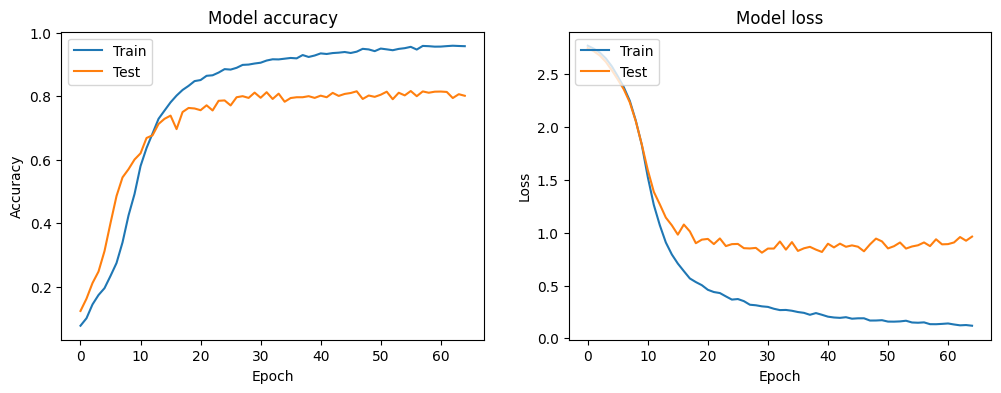

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


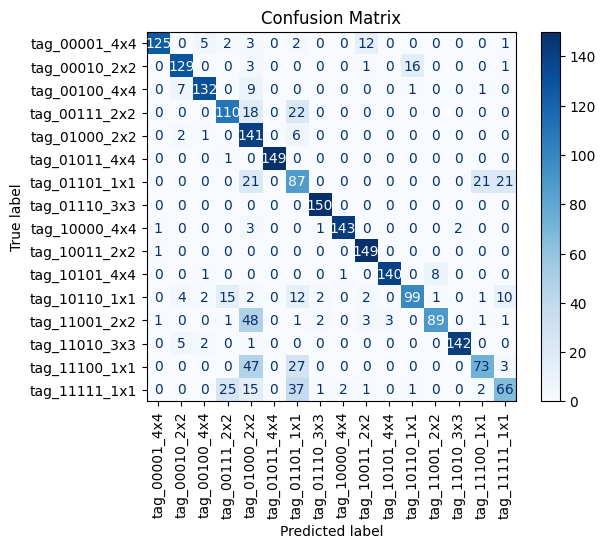

Exactitud del modelo: 80.17%
Tasa de errores: 19.83%


In [10]:
import tensorflow as tf
from functools import partial
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1601, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model.fit(x_out_1601, labels_1601_categorical, epochs=100, validation_data=(x_out_1601_test, labels_1601_categorical_test), callbacks=[callback])

model.save('classifier_a.keras')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(x_out_1601_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(labels_1601_categorical_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")


In [11]:
import numpy as np
import keras
from keras.models import load_model

x_train_autec = x_out_1601[:, 1:1601, :, :]
x_test_autec = x_out_1601_test[:, 1:1601, :, :]

# Cargar el modelo
model_path = "C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks/autoencoder_best_2.keras"

model = load_model(model_path)

# Predecir usando el modelo cargado
predictions_train = model.predict(x_train_autec)
predictions_test = model.predict(x_test_autec)

# Guardar las predicciones a archivos .npy para fácil carga posterior
np.save('predictions_train.npy', predictions_train)
np.save('predictions_test.npy', predictions_test)

print("Predicciones guardadas correctamente.")


150/150 ━━━━━━━━━━━━━━━━━━━━ 380s 3s/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 190s 3s/step
Predicciones guardadas correctamente.


c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.0728 - loss: 2.7729 - val_accuracy: 0.1542 - val_loss: 2.7189
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.1139 - loss: 2.7147 - val_accuracy: 0.2050 - val_loss: 2.5690
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.1887 - loss: 2.5225 - val_accuracy: 0.5542 - val_loss: 2.0592
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - accuracy: 0.3588 - loss: 2.0155 - val_accuracy: 0.7004 - val_loss: 1.3770
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.5276 - loss: 1.4381 - val_accuracy: 0.7750 - val_loss: 1.0465
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.6613 - loss: 1.0503 - val_accuracy: 0.8012 - val_loss: 0.9210
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.7235 - loss: 0.8415 - val_accuracy: 0.8296 - val_loss: 0.7817
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.7801 -

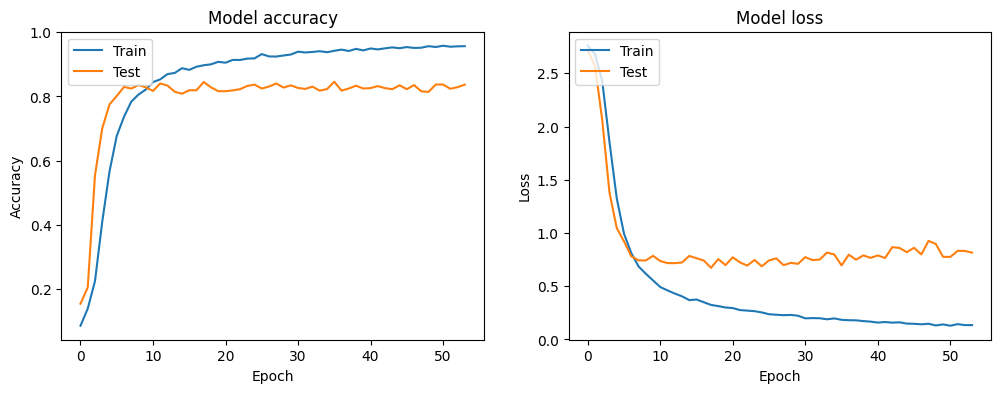

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step


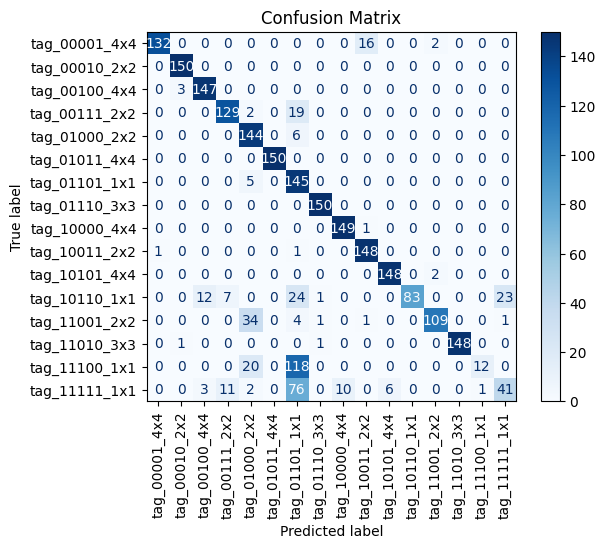

Exactitud del modelo: 82.71%
Tasa de errores: 17.29%


In [12]:
import tensorflow as tf
from functools import partial

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model.fit(predictions_train, labels_1601_categorical, epochs=100, validation_data=(predictions_test, labels_1601_categorical_test), callbacks=[callback])

model.save('classifier_b.keras')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(x_test_autec)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(labels_1601_categorical_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")